In [288]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.subplots as ms
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [289]:
# !pip install plotly
# !pip install statsmodels

In [290]:
df = pd.read_csv("../../Data/companies/통합_k.csv")
df

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id
0,1821303,112129,286,739619,49143,248468.3,13718.5,2
1,1620640,84066,395,469392,48097,462443.1,532689.2,1
2,423864,29504,65,190166,12612,57288.6,6703.3,3
3,496161,25831,82,160821,13902,77411.6,59554.5,3
4,363224,19340,86,136309,9981,46578.5,37541.7,3
...,...,...,...,...,...,...,...,...
131,226441,8607,40,85135,6103,28669.1,27669.5,0
132,243418,7481,44,79807,6405,39341.3,38725.4,0
133,217897,7835,32,73478,5554,22831.4,23634.2,0
134,94736,3989,23,40575,2856,20182.3,14025.4,0


## 랜덤포레스트 분류 모델 중요도

In [291]:
data = df[['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생']]
target = df['cluster_id'].to_numpy()

importances_arr = [0, 0, 0, 0, 0]

for _ in range(50):
    # RandomForest
    from sklearn.model_selection import cross_validate
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(criterion='entropy', n_jobs=-1) # default:100 # random_state=42
    rf.fit(data, target)
    
    importances_arr = [importances_arr[i] + rf.feature_importances_[i] for i in range(len(rf.feature_importances_))]

feature_importance = pd.DataFrame({
    'feature': data.columns,
    'importance': importances_arr,
    'color': ['red', 'green', 'yellow', 'blue', 'purple']
})

# 중요도순으로 정렬
feature_importance.sort_values('importance', inplace=True)

# index 바꾸기
feature_importance.set_index('feature', inplace=True, drop=True)
feature_importance['importance'] = feature_importance.importance / 50
feature_importance
    

,importance,color
feature,,
출생아수,0.054078,green
산부인과의원수,0.153330,yellow
도매 및 소매업 신생,0.255362,purple
초등학생인원수,0.265868,blue
전출인구,0.271362,red


In [292]:
feature_importance.importance / 50

feature
출생아수           0.001082
산부인과의원수        0.003067
도매 및 소매업 신생    0.005107
초등학생인원수        0.005317
전출인구           0.005427
Name: importance, dtype: float64

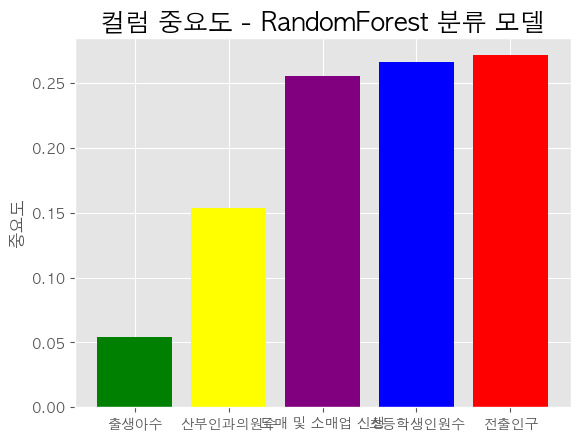

In [293]:
plt.style.use('ggplot')
plt.bar(
    feature_importance.index,
    feature_importance['importance'],
    # kind='bar', #barh: 옆으로 돌린 그래프
    # figsize=(8,5),
    color = feature_importance.color
)

plt.title('컬럼 중요도 - RandomForest 분류 모델', size=18)
plt.ylabel('중요도')
plt.xticks(rotation=0) #x라벨 로테이션
plt.rcParams['font.size'] = 10 
# plt.colorbar()

plt.show()

In [294]:
df

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id
0,1821303,112129,286,739619,49143,248468.3,13718.5,2
1,1620640,84066,395,469392,48097,462443.1,532689.2,1
2,423864,29504,65,190166,12612,57288.6,6703.3,3
3,496161,25831,82,160821,13902,77411.6,59554.5,3
4,363224,19340,86,136309,9981,46578.5,37541.7,3
...,...,...,...,...,...,...,...,...
131,226441,8607,40,85135,6103,28669.1,27669.5,0
132,243418,7481,44,79807,6405,39341.3,38725.4,0
133,217897,7835,32,73478,5554,22831.4,23634.2,0
134,94736,3989,23,40575,2856,20182.3,14025.4,0


## 상관계수

In [295]:
df_corr = df[['전출인구',	'출생아수',	'산부인과의원수',	'초등학생인원수',	'도매 및 소매업 신생',	'cluster_id']]
df_corr.corr()

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,cluster_id
전출인구,1.000000,0.967377,0.947372,0.970445,0.996578,0.312415
출생아수,0.967377,1.000000,0.881701,0.971545,0.957883,0.326438
산부인과의원수,0.947372,0.881701,1.000000,0.854155,0.944414,0.240778
초등학생인원수,0.970445,0.971545,0.854155,1.000000,0.967957,0.338174
도매 및 소매업 신생,0.996578,0.957883,0.944414,0.967957,1.000000,0.315317
cluster_id,0.312415,0.326438,0.240778,0.338174,0.315317,1.000000


In [296]:
feature_importance = pd.DataFrame({
    'feature': df_corr.columns[:5],
    'importance': df_corr.corr()['cluster_id'][:5],
    'color': ['red', 'green', 'yellow', 'blue', 'purple']
})

# 중요도순으로 정렬
feature_importance.sort_values('importance', inplace=True)

# index 바꾸기
feature_importance.set_index('feature', inplace=True, drop=True)
feature_importance['importance'] = feature_importance.importance
feature_importance

,importance,color
feature,,
산부인과의원수,0.240778,yellow
전출인구,0.312415,red
도매 및 소매업 신생,0.315317,purple
출생아수,0.326438,green
초등학생인원수,0.338174,blue


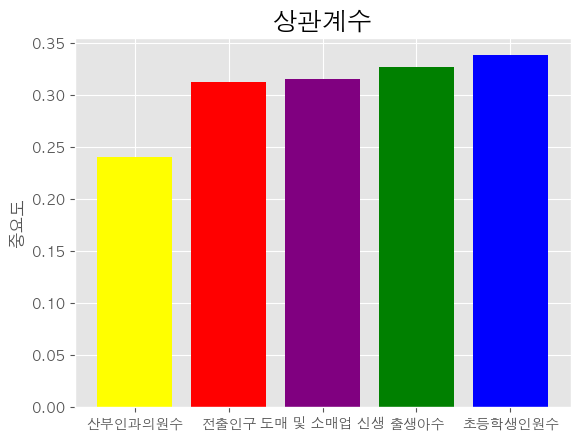

In [297]:
plt.style.use('ggplot')
plt.bar(
    feature_importance.index,
    feature_importance['importance'],
    # kind='bar', #barh: 옆으로 돌린 그래프
    # figsize=(8,5),
    color = feature_importance.color
)

plt.title('상관계수', size=18)
plt.ylabel('중요도')
plt.xticks(rotation=0) #x라벨 로테이션
plt.rcParams['font.size'] = 10 
# plt.colorbar()

plt.show()

---
## 다중 회귀 중요도

In [298]:
from sklearn.cluster import KMeans

df_temp = df.copy()
# df_temp.set_index('시도', inplace=True)
df_km = df_temp

data_points = df_km.values
km = KMeans(n_clusters=4).fit(data_points) # n_clusters 에 값을 정해주기!
df_km['cluster_id'] = km.labels_

df_km['cluster_id'] = df_km['cluster_id'] + 10
df_km_temp = df_km.sort_values(by='전출인구', ascending=True)
temp_list = df_km_temp['cluster_id'].unique()

# 클러스터 0~1로 변경
i = 3
for temp in temp_list:
    df_km['cluster_id'][df_km['cluster_id'] == temp] = i
    i-=1
df_km['cluster_id'] = np.round(df_km['cluster_id'] / 3, 2)
df_km['cluster_id'].unique()

# Feature, Target
data = df_km[['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생']].to_numpy()
target = df_km['cluster_id'].to_numpy()

# 데이터셋 나누기 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2) # random_state=42,  stratify=target
    
# # 표준화
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# ss.fit(train_input)
# train_scaled = ss.transform(train_input)
# test_scaled = ss.transform(test_input)

# 정규화
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler() #인스턴스 만들기
scaler.fit(data)
train_scaled = scaler.fit_transform(train_input)
test_scaled = scaler.fit_transform(test_input)
    
# 회귀 예측
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_scaled, train_target)
print("Train score:", lr.score(test_scaled, test_target))

Train score: 0.8897637175971765


In [299]:
df_km.columns[:5]

Index(['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생'], dtype='object')

In [300]:
# 전출인구	출생아수	산부인과의원수	초등학생인원수	도매 및 소매업 신생
abs(lr.coef_)

array([0.17738813, 0.17131734, 0.08509957, 0.73737048, 0.38974219])

In [301]:
feature_importance = pd.DataFrame({
    'feature': df_km.columns[:5],
    'importance': abs(lr.coef_),
    'color': ['red', 'green', 'yellow', 'blue', 'purple']
})

# 중요도순으로 정렬
feature_importance.sort_values('importance', inplace=True)

# index 바꾸기
feature_importance.set_index('feature', inplace=True, drop=True)
feature_importance['importance'] = feature_importance.importance / 50
feature_importance

,importance,color
feature,,
산부인과의원수,0.001702,yellow
출생아수,0.003426,green
전출인구,0.003548,red
도매 및 소매업 신생,0.007795,purple
초등학생인원수,0.014747,blue


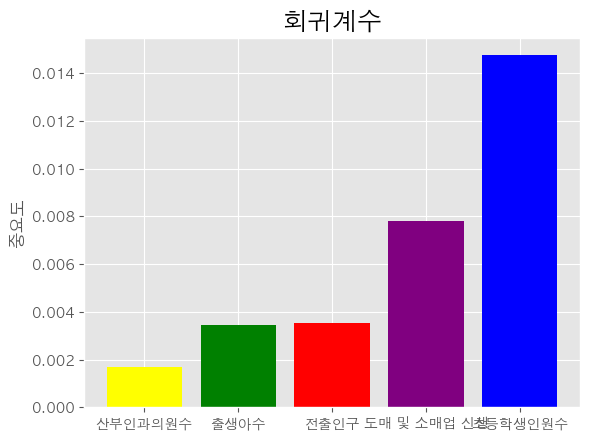

In [302]:
plt.style.use('ggplot')
plt.bar(
    feature_importance.index,
    feature_importance['importance'],
    # kind='bar', #barh: 옆으로 돌린 그래프
    # figsize=(8,5),
    color = feature_importance.color
)

plt.title('회귀계수 - 다중', size=18)
plt.ylabel('중요도')
plt.xticks(rotation=0) #x라벨 로테이션
plt.rcParams['font.size'] = 10 
# plt.colorbar()

plt.show()

## 치환 중요도

In [303]:
# 전출인구	출생아수	산부인과의원수	초등학생인원수	도매 및 소매업 신생
from sklearn.inspection import permutation_importance

lr.fit(train_input, train_target)
result = permutation_importance(lr, train_input, train_target, n_repeats=10, n_jobs=-1)
result.importances_mean

array([0.05455559, 0.0313836 , 0.00998636, 0.70245571, 0.19819067])

In [304]:
feature_importance = pd.DataFrame({
    'feature': df_km.columns[:5],
    'importance': result.importances_mean,
    'color': ['red', 'green', 'yellow', 'blue', 'purple']
})

# 중요도순으로 정렬
feature_importance.sort_values('importance', inplace=True)

# index 바꾸기
feature_importance.set_index('feature', inplace=True, drop=True)
feature_importance['importance'] = feature_importance.importance / 50
feature_importance

,importance,color
feature,,
산부인과의원수,0.000200,yellow
출생아수,0.000628,green
전출인구,0.001091,red
도매 및 소매업 신생,0.003964,purple
초등학생인원수,0.014049,blue


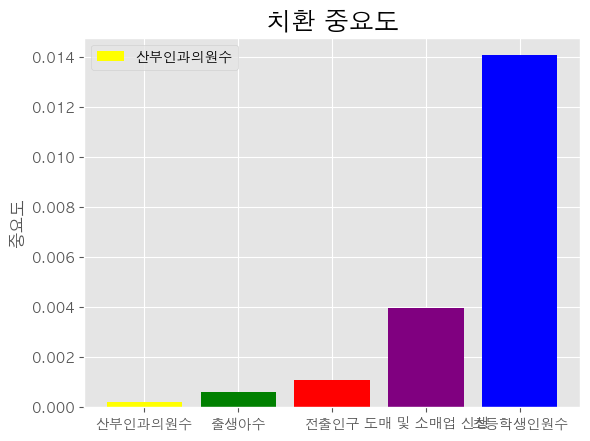

In [313]:
plt.style.use('ggplot')
plt.bar(
    feature_importance.index,
    feature_importance['importance'],
    # kind='bar', #barh: 옆으로 돌린 그래프
    # figsize=(8,5),
    color = feature_importance.color
)

plt.title('치환 중요도', size=18)
plt.ylabel('중요도')
plt.xticks(rotation=0) #x라벨 로테이션
plt.rcParams['font.size'] = 10 
# plt.colorbar()

plt.legend(labels=feature_importance.index)

plt.show()

In [309]:
feature_importance.index

Index(['산부인과의원수', '출생아수', '전출인구', '도매 및 소매업 신생', '초등학생인원수'], dtype='object', name='feature')

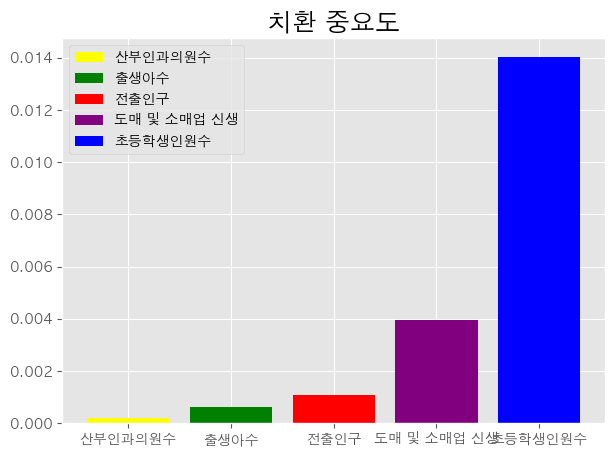

In [321]:
## 범례 -바 차트 기본
import matplotlib.pyplot as plt
import seaborn as sns
 
## 바 차트 그리기
fig = plt.figure(figsize=(7,5)) ## 캔버스 생성
ax = fig.add_subplot() ## 프레임(그림 뼈대) 생성
 
## 바 차트 생성
bars = ax.bar(
    feature_importance.index,
    feature_importance['importance'],
    color=feature_importance.color
              ) ## 막대기 요소 저장
 
ax.legend(handles=bars,labels=list(feature_importance.index)) ## 범례
 
plt.title('치환 중요도', size=18)
plt.show()